<a href="https://colab.research.google.com/github/DLPY/Regression-Session-1/blob/master/Simple_Linear_Regression_(Two_Variables).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Pandas, Pyplot and Read Data



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV is first read in from a github raw file another option is to import the notebook to your session storage by click on the file icon on left toolbar then importing csv
! wget https://raw.githubusercontent.com/DLPY/Regression-Session-1/master/Data/Salary.csv

# Once we have the csv file pd.read_csv() converts it to a pandas dataframe
df = pd.read_csv('Salary.csv')



--2021-10-07 09:05:21--  https://raw.githubusercontent.com/DLPY/Regression-Session-1/master/Data/Salary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454 [text/plain]
Saving to: ‘Salary.csv.1’

Salary.csv.1        100%[===================>]     454  --.-KB/s    in 0s      

2021-10-07 09:05:21 (15.8 MB/s) - ‘Salary.csv.1’ saved [454/454]



## 2. Investigating the Data

In [5]:
# First five columns 
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
# check types, nulls and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
# investigate the variability of the numeric columns
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 3. Split the dataset to prepare for training 



In [8]:
# Independent Variable
X = df.drop(['Salary'],axis=1).values

# Depenedent Variable
y = df.Salary.values

# Split Observations in 75% training set 25% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=21)


## 4. Train the model 

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Coefficient and Intercept
print(regressor.coef_)
print(regressor.intercept_)

[9424.08936678]
24773.05516926734


## 5. Predict the test values and Caluclate Error

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict test set from model built during training 
y_pred = regressor.predict(X_test)

# Mean Squared Error Average ((y_pred - y_test)^2)
mse = mean_squared_error(y_pred, y_test)

# Root Mean Squared Error - Root of above
rmse = np.sqrt(mse)

# Print Results
print("Linear Regression MSE: {}".format(mse))
print("Linear Regression RMSE: {}".format(rmse))

Linear Regression MSE: 48542473.243403405
Linear Regression RMSE: 6967.242872428333


# Visualise the Test Set 

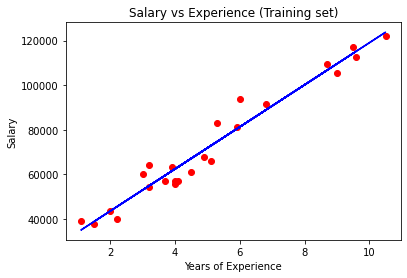

In [12]:
# Plot Real Points
plt.scatter(X_train, y_train, color = 'red')
# Plot Prediciton Line
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualise the test set 

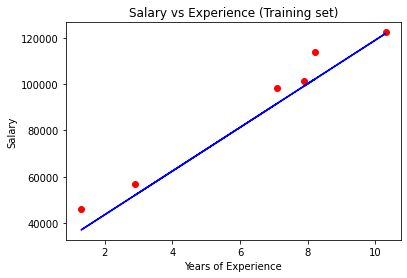

In [13]:
# Plot Real Points
plt.scatter(X_test, y_test, color = 'red')
# Plot Prediction Line
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
# Displaying Results and Difference in Table 
res = pd.DataFrame(y_pred, y_test)
res = res.reset_index()
res.columns = ['Salary', 'Prediction']
res['Prediction'] = round(res['Prediction'],0)
res['Difference'] = res['Salary'] - res['Prediction']
res

,Salary,Prediction,Difference
0,56642.0,52103.0,4539.0
1,113812.0,102051.0,11761.0
2,101302.0,99223.0,2079.0
3,122391.0,121841.0,550.0
4,46205.0,37024.0,9181.0
5,98273.0,91684.0,6589.0
